# Falling paper

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import cmath

In [120]:
pi = np.pi
# Parameters
k1 = 4.9     # friction coefficient perpendicular to the paper
k2 = k1/100   # friction coefficient parallel  to the paper
rho = 0.1  # ratio of the density of the fluid to that of the paper
l = 1.0       # length of the paper
g = 9.80

# Bundle parameters for ODE solver
params = [k1, k2, rho, l, g]

# Initial values
u0= -0.00001     # initial horizantal velocity
v0 = -0.0001    # initial vertical velocity
omega0 = 0.0 # initial angular velocity
theta0 = 0.01 # initial angular position of the paper

# Bundle initial conditions for ODE solver
y0 = [u0, v0,  omega0, theta0]

# Stopping time for solution
tStop = 20.0

In [121]:
def mps(u,v,th):
    ''' 
    The sign of the lift in the x direction
    '''
    alpha = cmath.phase(complex(u, v))
    sigmma = (alpha + th) 
    if ((0 < sigmma < pi) and (v < 0)) or ((-pi < sigmma < 0) and (v > 0)): return -1
    else: return 1

In [122]:
def f(t, y):
    '''
    Defines the velocity field 
    '''
    u,v,omega,theta = y    # unpack current values of y
    k1, k2,rho,l, g = params  # unpack parameters
    V =  np.sqrt(u**2+v**2)
    alpha = cmath.phase(complex(u, v)) 
    
    du = - (k1*np.sin(theta)**2 + k2*np.cos(theta)**2)*u  +  \
        (k1-k2)*v*np.sin(theta)*np.cos(theta) + mps(u,v,theta)*pi*rho*V**2*np.cos(theta + alpha)*np.cos(alpha)
              
    dv = (k1-k2)*u*np.sin(theta)*np.cos(theta)- (k1*np.cos(theta)**2 + k2*np.sin(theta)**2)*v + \
        -mps(u,v,theta)*pi*rho*V**2*np.cos(theta + alpha)*np.sin(alpha) -g
           
    domega = -k1*omega - 3*pi*rho*V**2/l*np.cos(theta + alpha)*np.sin(theta + alpha) 
    
    dtheta = omega
    
    return [du, dv, domega, dtheta]

[infp_solve_ivp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp)

In [123]:
# Call the ivp solver
soln = solve_ivp(f, (0, tStop),[u0, v0,  omega0, theta0], method='RK45', max_step =0.0005)
tt = soln.t
u,v, omega, theta = soln.y

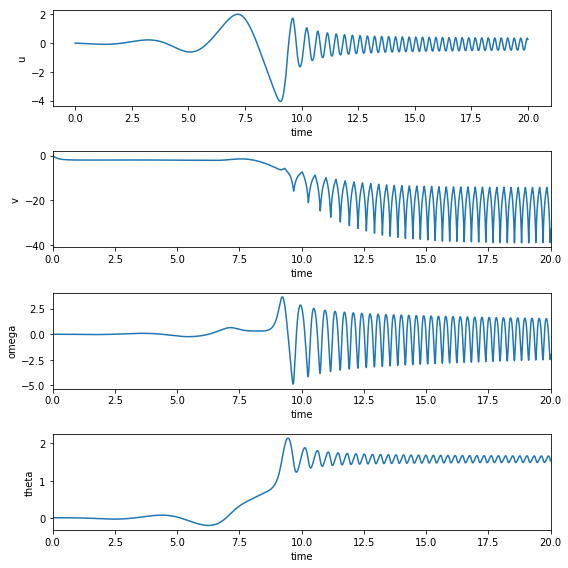

In [124]:
# Plot results
fig = plt.figure(1, figsize=(8,8))

# Plot u as a function of time
ax1 = fig.add_subplot(411)
ax1.plot(tt, u)
ax1.set_xlabel('time')
ax1.set_ylabel('u')

# Plot v as a function of time
ax2 = fig.add_subplot(412)
ax2.plot(tt, v)
ax2.set_xlabel('time')
ax2.set_ylabel('v')
ax2.set_xlim(0., tStop)

# Plot t vs omega
ax3 = fig.add_subplot(413)
ax3.plot(tt, omega)
ax3.set_xlabel('time')
ax3.set_ylabel('omega')
ax3.set_xlim(0., tStop)

# Plot omega vs theta
ax4 = fig.add_subplot(414)
ax4.plot(tt , theta)
ax4.set_xlabel('time')
ax4.set_ylabel('theta')
ax4.set_xlim(0., tStop)

plt.tight_layout()
plt.show()

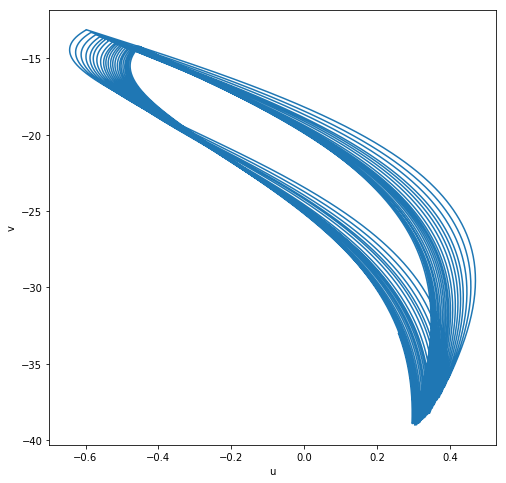

In [130]:
# Plot (u,v) velocities after trancients 
n = int(2*len(u)/3)
fig = plt.figure(1, figsize=(8,8))
ax1 = fig.add_subplot(111)
ax1.plot(u[n:], v[n:])
ax1.set_xlabel('u')
ax1.set_ylabel('v')
plt.show()

In [138]:
n = len(tt)
tt0, tt1  = tt[0:n-1], tt[1: n]
dt = tt1-tt0


In [143]:
xpos = np.cumsum(dt*u[0:n-1])
ypos = 30+np.cumsum(dt*v[0:n-1])

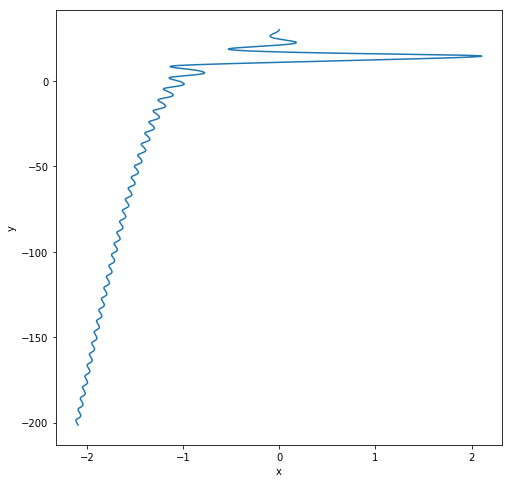

In [144]:
# Plot (x,y) position
fig = plt.figure(1, figsize=(8,8))
ax1 = fig.add_subplot(111)
ax1.plot(xpos, ypos)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
plt.show()